# Applied SQL Data Analytics

## Chapter 1

---

In [1]:
# === Imports === #
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Exercise 1.01 - Creating a histogram

In [2]:
# === Load the data === #
data_path = "../data/Datasets/heights.csv"
df_heights = pd.read_csv(data_path)

df_heights.head()

,height
0,182.395153
1,177.369198
2,182.198838
3,176.988964
4,163.689656


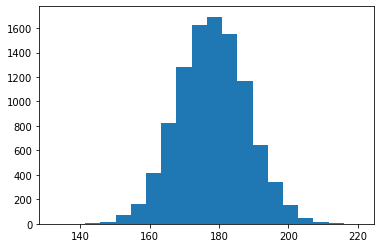

In [3]:
# Create plot
plt.hist(df_heights["height"], bins=20);

## Exercise 1.02 - Calculating Quartiles

In [14]:
# === Load and clean data === #
data_path = "../data/Datasets/auto_upgrades.csv"
df_autos = pd.read_csv(data_path)
# Rename column
df_autos = df_autos.rename(columns={"Add-on Sales ($)": "sales"})

df_autos.head()

,sales
0,5000.0
1,1700.0
2,8200.0
3,1500.0
4,3300.0


In [15]:
df_autos.sort_values(by="sales")

,sales
7,0.0
8,0.0
3,1500.0
1,1700.0
6,2000.0
9,2300.0
4,3300.0
10,4700.0
0,5000.0
2,8200.0


## Exercise 1.03 - Central Tendency

In [28]:
# === Mode === #
df_mode = df_autos["sales"].mode()
print("mode:", df_mode)
df_mean = df_autos["sales"].mean()
print("mean:", df_mean)
df_median = df_autos["sales"].median()
print("median:", df_median)

mode: 0    0.0
dtype: float64
mean: 3427.2727272727275
median: 2300.0


## Exercise 1.04 - Dispersion

* Range
* Std dev
* IQR
* Number of outliers

In [25]:
# === Range === #
# Min value subtracted from haxirnge = n() - df_autos["sales"] - df_autos["sales"].min()
rnge  # Should be 9000 - 0 = 9000.max()

-9000.0

In [27]:
# === Standard deviation === #
# Normalized to n-1 by default (sample stdev)
df_autos["sales"].std()

3023.934823732452

In [34]:
# === Stdev manual calculation === #
df_autos["diff_mean_sq"] = df_autos["sales"].apply(lambda x: (df_mean - x) ** 2)
stdev_manual = ((df_autos["diff_mean_sq"].sum()) / (len(df_autos["sales"]) - 1)) ** 0.5
stdev_manual

3023.934823732452

In [36]:
# === IQR === #
# Interquartile range is 3rd quartile - 1st quartile
iqr = df_autos["sales"].quantile(q=0.75) - df_autos["sales"].quantile(q=0.25)
iqr

3250.0

## Exercise 1.05 - Pearson Correlation Coefficient

In [43]:
# === Load and clean data === #
data_path = "../data/Datasets/salesman.csv"
df_sman = pd.read_csv(data_path)
df_sman = df_sman.rename(columns={"Hours Worked Per Week": "hours_wk", "Sales Per Week ($)": "sales_wk"})

df_sman.head()

,hours_wk,sales_wk
0,40,179480.58
1,56,2495037.37
2,50,2285369.51
3,82,2367896.33
4,41,1309745.16


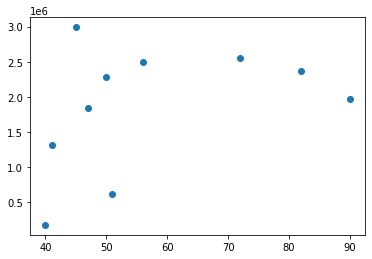

In [44]:
plt.scatter(df_sman["hours_wk"], df_sman["sales_wk"]);

In [46]:
# User numpy to calculate correlation coefficient
correlation = np.corrcoef(df_sman["hours_wk"], df_sman["sales_wk"])
correlation[1][0]

0.38112413500250136

### Activity 1.02

Dealership data

In [3]:
# === Load the data === #
data_path = "../data/Datasets/dealerships.csv"
df_dealer = pd.read_csv(data_path)
df_dealer.head()

,Location,Net Annual Sales,Number of Female Employees
0,"Millburn, NJ",150803012.0,27
1,"Los Angeles, CA",110872084.0,17
2,"Houston, TX",183945873.0,22
3,"Miami, FL",156355396.0,18
4,"San Mateo, CA",143108603.0,17


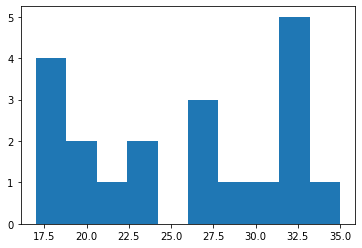

In [6]:
# === Frequency distribution === #
plt.hist(df_dealer["Number of Female Employees"], bins=10);

In [9]:
# Avg and median
print("Average annual sales:", df_dealer["Net Annual Sales"].mean())
print("Median annual sales:", df_dealer["Net Annual Sales"].median())
print("Stdev of annual sales:", df_dealer["Net Annual Sales"].std())

Average annual sales: 171603750.135
Median annual sales: 170130716.5
Stdev of annual sales: 50152290.42090914


In [10]:
df_dealer.describe()

,Net Annual Sales,Number of Female Employees
count,2.000000e+01,20.000000
mean,1.716038e+08,25.800000
std,5.015229e+07,6.143889
min,9.551281e+07,17.000000
25%,1.450191e+08,19.750000
50%,1.701307e+08,27.000000
75%,1.823518e+08,32.000000
max,3.505207e+08,35.000000


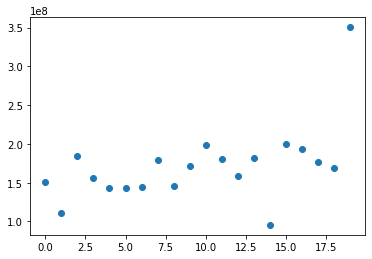

In [11]:
plt.scatter(df_dealer.index, df_dealer["Net Annual Sales"])

In [13]:
df_dealer[df_dealer["Net Annual Sales"] > 200000000.0]

,Location,Net Annual Sales,Number of Female Employees
19,"Boston, MA",350520724.0,20


Based on a simple scatter of sales, it seems that there is one dealership with much higher net annual sales than the others: Boston, MA.

In [14]:
# === Correlation of sales - female employees === #
np.corrcoef(df_dealer["Net Annual Sales"], df_dealer["Number of Female Employees"])

array([[1.        , 0.10457985],
       [0.10457985, 1.        ]])

---

### Working with missing data

* Delete rows with nulls
* Impute using mean/median/mode
* Impute using regression
* Deleting variables

---

### Statistical significance testing

* Test statistic  : the statistic that is being examined and tested
* Null hypothesis : the observed results are due to chance
* Alternative hypothesis : The observed results cannot be explained by chance alone
* Significance level : value the test statistic needs to cross before null hypothesis can be rejected

Common statistical significance tests

* Two-sample z-test : the average of the two samples is different
  * Assumes both samples drawn from normal distribution with known population standard deviation
* Two-sample t-test : the average of the two samples is different
  * Sample set is small or population standard deviation is not known
* Chi-squared : the distribution of data points to categories is different from chance
  * Commonly used for testing if proportions in tests like A/B tests are beyond what would be expected from chance

---

### RDBMS

Relational DBs are very robust, efficient, intuitive. However, they have limited scalability and may not be the best way to represent certain data structures.

* ACID
  * Atomicity
  * Consistency
  * Isolation
  * Durability